# Second part of the w4 hw assingment I turned in. 

## previously...in the other notebook,

I did some data exploration on a dataset I created by filtering data from the FHFA datatset. I had also wanted to begin mapping the housing price index data, but I got stuck because the data is a csv file with no longitude or latitude information. It also did not have a geometry column, meaning I could not map it. The csv file only has census tract in the form of 10 digit geoid.

## in this notebook 

I am picking up where I left off. I needed to merge the csv file with a geojson file somehow. I decided to use the tenure data from the American Survey (5yr Est.) that is sorted by census tract from the Census Bureau website. I figured I would merge the dataset by the geoid. By doing this, my csv file will become a geojson and have a geometry element, making it mapable! 

In [33]:
#importing packages 

# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [34]:
# the geofile is file with the geometry element 
geofile = gpd.read_file('acs2019_5yr_B25003_14000US06037222001.geojson')

In [35]:
# the fhfa is the csv file with the data i want to map
fhfa = gpd.read_file('FHFA_HPI_Fixed.csv')

In [36]:
# i want to look at what the columns look like for the geofile
geofile.head()

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,843.0,117.0,732.0,127.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,1072.0,108.0,240.0,96.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,401.0,146.0,1896.0,168.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,535.0,98.0,822.0,88.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,93.0,1255.0,105.0,190.0,78.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [37]:
# checking the last rows of data for that one bad row 
#i remember we usually have to delete one row of data when we get it from the Census Bureau
geofile.tail()

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",4.0,7.0,4.0,7.0,0.0,12.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,0.0,12.0,24.0,27.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",1383869.0,3704.0,509504.0,4259.0,874365.0,4087.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


In [38]:
# dropping this row because it is not a census tract. we don't like her. 
fhfa=fhfa.drop([1004])

In [39]:
# looking at the first couple of rows of data
fhfa.head()

,addition to geoid,geoid,field_3,hpi 2010,hpi 2019,% change,geometry
0,14000US0,6037101110,14000US06037101110,505.95,934.82,0.85,None
1,,6037101122,14000US06037101122,529.61,930.17,0.76,None
2,,6037101210,14000US06037101210,212.75,358.07,0.68,None
3,,6037101220,14000US06037101220,289.52,591.62,1.04,None
4,,6037101300,14000US06037101300,481.9,832.05,0.73,None


In [40]:
# checking the last couple of rows of data
fhfa.tail()

,addition to geoid,geoid,field_3,hpi 2010,hpi 2019,% change,geometry
1635,,6037920331,14000US06037920331,528.12,775.22,0.47,None
1636,,6037920332,14000US06037920332,277.51,400.82,0.44,None
1637,,6037920334,14000US06037920334,591,862.3,0.46,None
1638,,6037920336,14000US06037920336,250.63,385.23,0.54,None
1639,,6037920338,14000US06037920338,174.88,230.58,0.32,None


# Data exploration and initiating the merge

## I am going to look at the data more closely, dropping columns, renaming columns, and etc.

In [41]:
# I am just pulling the information and looking at the column names and data type
geofile.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1005 non-null   object  
 1   name              1005 non-null   object  
 2   B25003001         1005 non-null   float64 
 3   B25003001, Error  1005 non-null   float64 
 4   B25003002         1005 non-null   float64 
 5   B25003002, Error  1005 non-null   float64 
 6   B25003003         1005 non-null   float64 
 7   B25003003, Error  1005 non-null   float64 
 8   geometry          1005 non-null   geometry
dtypes: float64(6), geometry(1), object(2)
memory usage: 70.8+ KB


In [42]:
# I am listing which columns I want to keep
columns_to_keep = ['geoid','name','B25003001','B25003002','B25003003','geometry']

In [43]:
# I am applying the function and dropping the columns
geofile = geofile [columns_to_keep]

In [44]:
# Checking to see if the columns have been dropped 
geofile.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geoid      1005 non-null   object  
 1   name       1005 non-null   object  
 2   B25003001  1005 non-null   float64 
 3   B25003002  1005 non-null   float64 
 4   B25003003  1005 non-null   float64 
 5   geometry   1005 non-null   geometry
dtypes: float64(3), geometry(1), object(2)
memory usage: 47.2+ KB


In [45]:
# I am repeating what I did earlier but with the fhfa data
fhfa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1639 entries, 0 to 1639
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   addition to geoid  1639 non-null   object  
 1   geoid              1639 non-null   object  
 2   field_3            1639 non-null   object  
 3   hpi 2010           1639 non-null   object  
 4   hpi 2019           1639 non-null   object  
 5   % change           1639 non-null   object  
 6   geometry           0 non-null      geometry
dtypes: geometry(1), object(6)
memory usage: 102.4+ KB


In [46]:
# listing what columns to keep 
columns_to_keep= ['field_3','hpi 2010','hpi 2019','% change','geometry']

In [47]:
# applying the function
fhfa=fhfa[columns_to_keep]

In [48]:
# checking if the function worked and the other columns have been dropped
# note, the data type is all object! this is not good cause we cannot map objects.
# we will change it after we rename the "field_3" columns
fhfa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1639 entries, 0 to 1639
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   field_3   1639 non-null   object  
 1   hpi 2010  1639 non-null   object  
 2   hpi 2019  1639 non-null   object  
 3   % change  1639 non-null   object  
 4   geometry  0 non-null      geometry
dtypes: geometry(1), object(4)
memory usage: 76.8+ KB


## Renaming the one column!

In [49]:
# getting the list for the fhfa columns so i can copy and paste it later and rename it
# i realize i only need to do this for the fhfa hpi data since i don't need the tenure data
list(fhfa)

['field_3', 'hpi 2010', 'hpi 2019', '% change', 'geometry']

In [50]:
# renaming the field_3 column
fhfa.columns= ['geoid', 'hpi 2010', 'hpi 2019', '% change', 'geometry']

## Changing the data type 

We cannot map objects so we must change them into floats, except for the geoid column

In [51]:
fhfa['hpi 2010'] = fhfa ['hpi 2010'].astype(float)
fhfa['hpi 2019'] = fhfa ['hpi 2019'].astype(float)
fhfa['% change'] = fhfa ['% change'].astype(float)

In [52]:
# checking if it worked
fhfa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1639 entries, 0 to 1639
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geoid     1639 non-null   object  
 1   hpi 2010  1639 non-null   float64 
 2   hpi 2019  1639 non-null   float64 
 3   % change  1639 non-null   float64 
 4   geometry  0 non-null      geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 76.8+ KB


In [53]:
# pulling up the geofile info to make suret the geoid datatypes match 
# the column name and data type must match in order for us to merge
geofile.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geoid      1005 non-null   object  
 1   name       1005 non-null   object  
 2   B25003001  1005 non-null   float64 
 3   B25003002  1005 non-null   float64 
 4   B25003003  1005 non-null   float64 
 5   geometry   1005 non-null   geometry
dtypes: float64(3), geometry(1), object(2)
memory usage: 47.2+ KB


## Commence the MERGE

In [54]:
# merging the data
fhfa=fhfa.merge(geofile,on= 'geoid')

In [55]:
# checking to see if it worked
fhfa.head(5)

,geoid,hpi 2010,hpi 2019,% change,geometry_x,name,B25003001,B25003002,B25003003,geometry_y
0,14000US06037101110,505.95,934.82,0.85,None,"Census Tract 1011.10, Los Angeles, CA",1575.0,843.0,732.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,529.61,930.17,0.76,None,"Census Tract 1011.22, Los Angeles, CA",1312.0,1072.0,240.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,212.75,358.07,0.68,None,"Census Tract 1012.10, Los Angeles, CA",2297.0,401.0,1896.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,289.52,591.62,1.04,None,"Census Tract 1012.20, Los Angeles, CA",1357.0,535.0,822.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,481.90,832.05,0.73,None,"Census Tract 1013, Los Angeles, CA",1445.0,1255.0,190.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


it worked! notice, the geomtry column! now the fhfa hpi data can be mapped. For my next step, I need to drop all the tenure data columns. 

In [56]:
# naming the columns i need to keep
columns_to_keep= ['geoid','hpi 2010','hpi 2019','% change','name','geometry_y']

In [57]:
# executing the function 
fhfa=fhfa[columns_to_keep]

In [58]:
# checking if it worked 
fhfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 574
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geoid       575 non-null    object  
 1   hpi 2010    575 non-null    float64 
 2   hpi 2019    575 non-null    float64 
 3   % change    575 non-null    float64 
 4   name        575 non-null    object  
 5   geometry_y  575 non-null    geometry
dtypes: float64(3), geometry(1), object(2)
memory usage: 31.4+ KB


In [59]:
# listing the column names so i can copy and paste
# i only need to change the geometry_y to geometry
# Ariana said if i didn't drop the y it would give me a hard time later 
list(fhfa)

['geoid', 'hpi 2010', 'hpi 2019', '% change', 'name', 'geometry_y']

In [60]:
# renaming the columns
fhfa.columns = ['geoid', 'hpi 2010', 'hpi 2019', '% change', 'name', 'geometry']

In [61]:
# checking to see if it worked 
fhfa.head()

,geoid,hpi 2010,hpi 2019,% change,name,geometry
0,14000US06037101110,505.95,934.82,0.85,"Census Tract 1011.10, Los Angeles, CA","MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,529.61,930.17,0.76,"Census Tract 1011.22, Los Angeles, CA","MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,212.75,358.07,0.68,"Census Tract 1012.10, Los Angeles, CA","MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,289.52,591.62,1.04,"Census Tract 1012.20, Los Angeles, CA","MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,481.90,832.05,0.73,"Census Tract 1013, Los Angeles, CA","MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [62]:
# just checking how many columns and rows
fhfa.shape

(575, 6)

<AxesSubplot:>

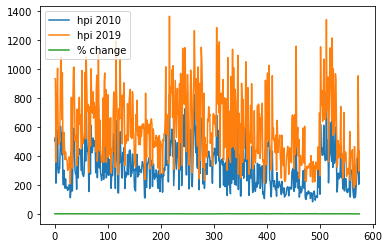

In [63]:
# try to see what it would look like plotted 
# i do not know how to interpret the plot 
fhfa.plot()

In [64]:
# crucial step that is needed to make sure we can map the data 
fhfa_web_mercator = fhfa.to_crs(epsg=3857) 

AttributeError: 'DataFrame' object has no attribute 'to_crs'

In [65]:
# addressing the error as there is no Dataframe
from geopandas import GeoDataFrame

In [66]:
# updating the fhfa data so it is a dataframe
fhfa = GeoDataFrame(fhfa)

In [67]:
# trying again to see if it worked
fhfa_web_mercator = fhfa.to_crs(epsg=3857)

<AxesSubplot:>

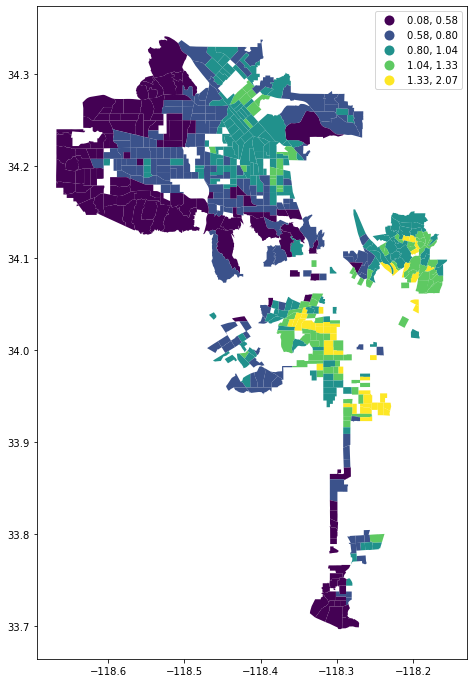

In [68]:
# plottin the percent change variable to see what it would look like 
fhfa.plot(figsize=(12,12),
                 column='% change',
                 legend=True, 
                 scheme='NaturalBreaks')

interesting! from 2010 to 2019, we see the housing price index increase the MOST near South and Southeast LA, not fully sure without seeing the street because I am not familiary with LA. I am assuming there are gaps in the map because there are no houses in the area? I am not sure why there is a gap in the data there.

<AxesSubplot:>

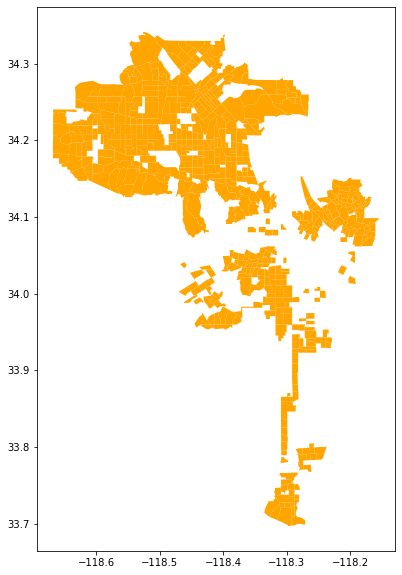

In [69]:
# i wanted to map only the positive increase in percent change of the housing price index. 
fhfa[fhfa['% change'] > 0].plot(figsize=(12,10),color="orange")

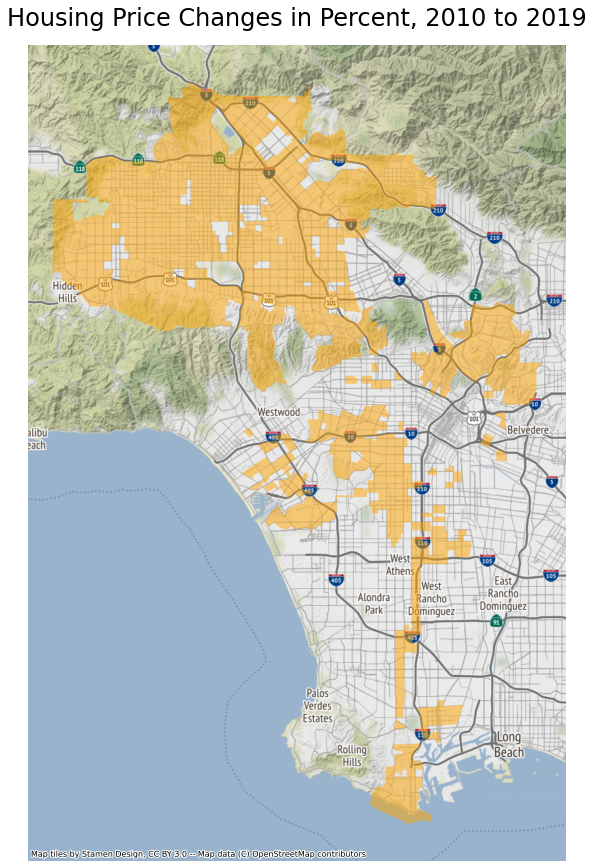

In [70]:
# use subplots that make it easier to create multiple layered maps
fig, ax= plt.subplots(figsize=(15,15))

# add the layer with ax=ax in the argument 
fhfa_web_mercator[fhfa_web_mercator ['% change'] > 0].plot(ax=ax, color='orange',alpha=0.5)
                                            
# turn off axis
ax.axis ('off')
                                            
#set a title
ax.set_title('Housing Price Changes in Percent, 2010 to 2019', fontsize=24,pad=20)

#add basemap
ctx.add_basemap(ax)

# WE DID IT!!!! 

## the next step is to add the parks data on top. 